- dataset name = coco dataset
- version      = yolo v3 
- yolo version 3 search paper = https://arxiv.org/pdf/1804.02767.pdf
- website      = https://pjreddie.com/darknet/yolo/
- coco dataset website = https://cocodataset.org/
- coco dataset research paper = https://arxiv.org/pdf/1405.0312.pdf


In [1]:
import cv2 
import numpy as np 


In [224]:
image = cv2.imread('./testing images/car_image.jpg')

In [225]:
print(image)  # pixel intensity in an image 


[[[228 193 125]
  [229 194 126]
  [228 195 126]
  ...
  [206 153  72]
  [205 152  71]
  [204 151  70]]

 [[227 195 124]
  [228 196 125]
  [228 196 125]
  ...
  [205 154  74]
  [206 153  72]
  [204 151  70]]

 [[228 196 125]
  [228 196 125]
  [229 197 126]
  ...
  [206 154  77]
  [204 153  73]
  [203 152  72]]

 ...

 [[165 186 194]
  [158 179 187]
  [119 141 152]
  ...
  [117 142 158]
  [118 143 159]
  [115 140 156]]

 [[148 173 189]
  [149 174 190]
  [148 173 189]
  ...
  [124 150 164]
  [123 148 164]
  [113 138 154]]

 [[145 170 186]
  [145 170 186]
  [130 155 171]
  ...
  [119 145 159]
  [120 145 161]
  [116 141 157]]]


In [226]:
# finding the shape of an image 

image.shape  # first parameter for height , width and channels 

(450, 600, 3)

In [227]:
# finding whether its working fine or not 

cv2.imshow('car',image)
cv2.waitKey()
cv2.destroyAllWindows()

In [228]:
# total 80 on coco dataset (90) extra 10 recently added so total 90 classes 

classes_names = []
k = open('./Files/class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())

In [229]:
len(classes_names)

91

In [230]:
classes = ['car','person','bus']

In [231]:
original_with , original_height = image.shape[1] , image.shape[0]


In [232]:
original_with , original_height

(600, 450)

In [233]:
# Loading cfg file and weights file which are already trained on cooc dataset. 

Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')


In [234]:
Neural_Network.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
Neural_Network.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [235]:
blob = cv2.dnn.blobFromImage(image,1/255,(320,320),True , crop = False)

In [236]:
blob.shape

(1, 3, 320, 320)

In [237]:
## Getting layer Names 

layers = Neural_Network.getLayerNames()
layers

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [238]:
layer_names = Neural_Network.getUnconnectedOutLayersNames()
layer_names

('yolo_82', 'yolo_94', 'yolo_106')

In [239]:
layer_index = Neural_Network.getUnconnectedOutLayers()
layer_index

array([200, 227, 254])

In [240]:
layer_index = [layers[j-1] for j in Neural_Network.getUnconnectedOutLayers()]

# since index of any os starts with 0 but this layers count start with 1 

In [241]:
layer_index

['yolo_82', 'yolo_94', 'yolo_106']

In [242]:
Neural_Network.setInput(blob)  # input for network 

In [243]:
outputs = Neural_Network.forward(layer_index)  # giving data to last 3 yolo layers 

# each layer predicts its bounding boxes 

In [244]:
outputs

(array([[0.05667376, 0.04691763, 0.36925432, ..., 0.        , 0.        ,
         0.        ],
        [0.06766701, 0.03680713, 0.3220534 , ..., 0.        , 0.        ,
         0.        ],
        [0.06719583, 0.03247025, 1.1873826 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95316714, 0.9352873 , 0.45673794, ..., 0.        , 0.        ,
         0.        ],
        [0.95356673, 0.9539013 , 0.3959835 , ..., 0.        , 0.        ,
         0.        ],
        [0.9584676 , 0.94814044, 1.0960126 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.03237753, 0.02889374, 0.07482685, ..., 0.        , 0.        ,
         0.        ],
        [0.02198009, 0.02940429, 0.3433531 , ..., 0.        , 0.        ,
         0.        ],
        [0.03533849, 0.0241211 , 0.1196957 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97088605, 0.97476596, 0.05721319, ..., 0.        , 0.        ,
         0.        

In [245]:
outputs[0].shape # 300 bounding boxes in first box and 85 predcitions in each box 

(300, 85)

In [246]:
# 5-> (x,y,h,w,confidence) + 80 labels in coco dataset 

In [247]:
outputs[1].shape  # this is in second output layer 

(1200, 85)

In [248]:
outputs[2].shape  # this is in third output layer 

(4800, 85)

In [249]:
Threshold = 0.3
image_size = 320


def finding_locations(outputs):
    
    bounding_box_locations = []
    class_ids = []
    confidence = []   

    for i in outputs:
        for j in i:
            class_prob = j[5:]                     # finding prob values for all classes 
            class_ids1 = np.argmax(class_prob)      # selecting highest one 
            confidence_value = class_prob[class_ids1]     # selecting its confidence value 
            
            if confidence_value > Threshold:
                # finding w and h 
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
               # print(w , h)
                # finding x and y
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h / 2)
                bounding_box_locations.append([x,y,w,h])
                class_ids.append(class_ids1)
                confidence.append(float(confidence_value))
                
    
    indeces = cv2.dnn.NMSBoxes(bounding_box_locations,confidence,Threshold,0.5)
    return indeces,bounding_box_locations,confidence,class_ids

    
    

In [250]:
predicted_box , bounding_box , conf , classes = finding_locations(outputs)

In [251]:
predicted_box

array([0])

In [252]:
bounding_box

[[38, 117, 231, 137],
 [46, 115, 230, 140],
 [47, 123, 214, 140],
 [49, 125, 226, 138]]

In [253]:
conf

[0.9970571398735046,
 0.9689246416091919,
 0.9756470322608948,
 0.9263579845428467]

In [254]:
classes[0]

2

In [255]:
font = cv2.FONT_HERSHEY_COMPLEX
height_ratio = original_height / 320
width_ration = original_with / 320

In [256]:
import matplotlib.pyplot as plt 

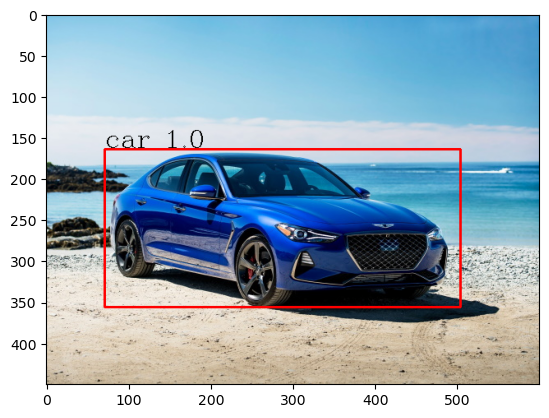

In [257]:
for j in predicted_box.flatten():
    
    x, y , w , h = bounding_box[j]
    x = int(x * width_ration)
    y = int(y * height_ratio)
    w = int(w * width_ration)
    h = int(h * height_ratio)
    
    label = str(classes_names[classes[j]])
    conf_ = str(round(conf[j],2))
    cv2.rectangle(image , (x,y) , (x+w , y+h) , (0,0,255) , 2)
    cv2.putText(image , label+' '+conf_ , (x , y-2) , font , 1 , (0,0,0),1)

#cv2.imshow('Yolo image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
plt.imshow(image[:,:,::-1])

In [78]:
## comlete code 

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2

font = cv2.FONT_HERSHEY_COMPLEX

Threshold = 0.5
image_size = 320


def final_prediction(prediction_box , bounding_box , confidence , class_labels,width_ratio,height_ratio):
    for j in prediction_box.flatten():
        x, y , w , h = bounding_box[j]
        x = int(x * width_ratio)
        y = int(y * height_ratio)
        w = int(w * width_ratio)
        h = int(h * height_ratio)

        label = str(classes_names[class_labels[j]])
        conf_ = str(round(confidence[j],2))
        cv2.rectangle(image , (x,y) , (x+w , y+h) , (0,0,255) , 2)
        cv2.putText(image , label+' '+conf_ , (x , y-2) , font , .5 , (0,255,0),1)

def bounding_box_prediction(output_data):
    bounding_box = []
    class_labels = []
    confidence_score = []
    for i in output_data:
        for j in i:
            high_label = j[5:]
            classes_ids = np.argmax(high_label)
            confidence = high_label[classes_ids]
            
            if confidence > Threshold:
                w , h = int(j[2] * image_size) , int(j[3] * image_size)
                x , y = int(j[0] * image_size - w/2) , int(j[1] * image_size - h/2)
                bounding_box.append([x,y,w,h])
                class_labels.append(classes_ids)
                confidence_score.append(confidence)

    prediction_boxes = cv2.dnn.NMSBoxes(bounding_box , confidence_score , Threshold , .6)    
    return prediction_boxes , bounding_box ,confidence_score,class_labels





image = cv2.imread('./testing_images/test_1.jpg')
#cv2.imshow('image',image)
#cv2.waitKey()
#cv2.destroyAllWindows()
original_with , original_height = image.shape[1] , image.shape[0]

Neural_Network = cv2.dnn.readNetFromDarknet('./Files/yolov3.cfg','./Files/yolov3.weights')
classes_names = []
k = open('./Files/class_names','r')
for i in k.readlines():
    classes_names.append(i.strip())
#print(classes_names)
blob = cv2.dnn.blobFromImage(image , 1/255 , (320,320) , True , crop = False)
#print(blob.shape)
Neural_Network.setInput(blob)
cfg_data = Neural_Network.getLayerNames()
#print(cfg_data)
layer_names = Neural_Network.getUnconnectedOutLayers()
outputs = [cfg_data[i-1] for i in layer_names]
#print(outputs)
output_data = Neural_Network.forward(outputs)
prediction_box , bounding_box , confidence , class_labels = bounding_box_prediction(output_data)
final_prediction(prediction_box , bounding_box , confidence , class_labels , original_with / 320 , original_height / 320 )

In [21]:
cv2.imshow('prediction ',image)
cv2.waitKey()
cv2.destroyAllWindows()